## Solar Radiation Part 2

#### What is the relative optical air mass (ROAM) at solar noon through the year?

In [3]:
# functions and packages from before
library(ggplot2)
library(tidyr)

radToDeg <- function(r) {return(r * (180/pi))}
degToRad <- function(deg) {return(deg*(pi/180))}

getGamma <- function(yd) {return((2*pi)/365 * (yd-1))} # returned in radians!
getDelta <- function(gamma) {
  delta <- 0.006918 - 0.399912*cos(gamma) + 0.070257*sin(gamma) - 
    0.006758*cos(2*gamma) + 0.000907*sin(2*gamma) - 
    0.002697*cos(3*gamma) + 0.00148*sin(3*gamma)
  return(delta) # returned in radians!
}

In [2]:
# some new functions for maximum zenith angle and ROAM

getZenithMax <- function(latitude, declination) {
  # declination = delta = should already be in rads
  latitude <- degToRad(latitude) # convert lat to rads
  maxZenith <- acos(sin(latitude)*sin(declination)+cos(latitude)*cos(declination)) # skip hour angle as h=0 at local solar noon
  return(radToDeg(maxZenith)) # returns in DEGREES!
}

getRelativeOpticalAirMass <- function(Z) {
  return(1/cos(degToRad(Z)))
}

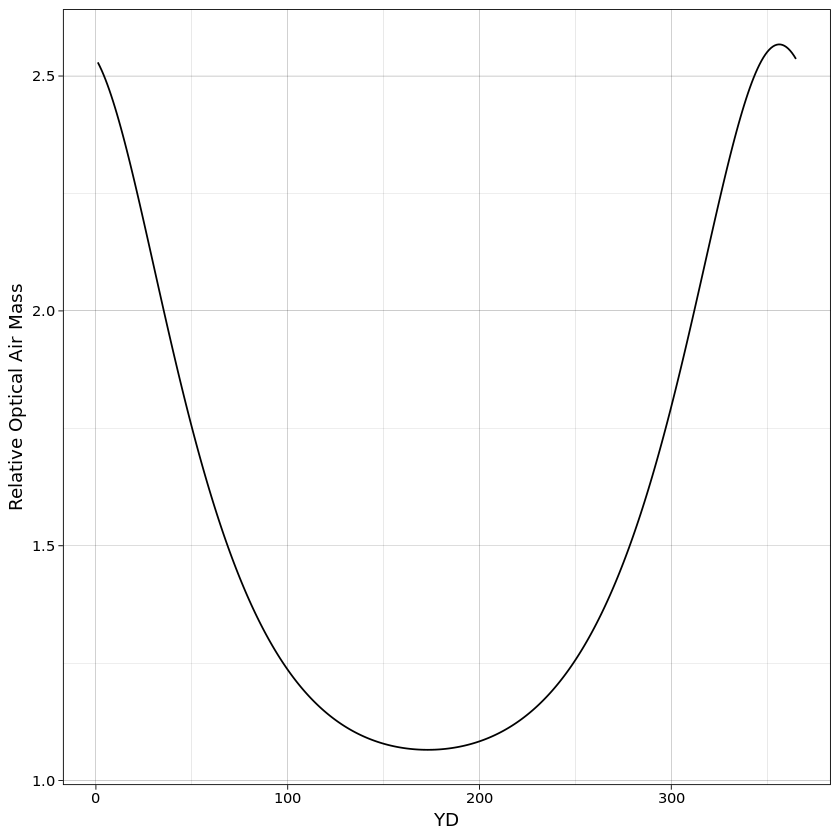

In [4]:

#  !! pick a latitude in degrees !!
# positive for N, negative for S of equator
latitude <- 43.65 # for Toronto


days <- seq(1,365,1)
# get the maximum zenith and corresponding relative optical air mass for each day
dailyMaxZenith <- getZenithMax(latitude, getDelta(getGamma(days)))
RelOptAirMass <- getRelativeOpticalAirMass(dailyMaxZenith)

# plotting
roamDist <- as.data.frame(cbind(days,RelOptAirMass))
ggplot(roamDist, aes(x=days, y=RelOptAirMass)) + geom_line() + theme_linedraw() +
  labs(x="YD", y="Relative Optical Air Mass")


Change the latitude in the above cell and re-run the code to see how ROAM changes with latitude and time of year

#### Now let's pick three different cities and compare them directly:

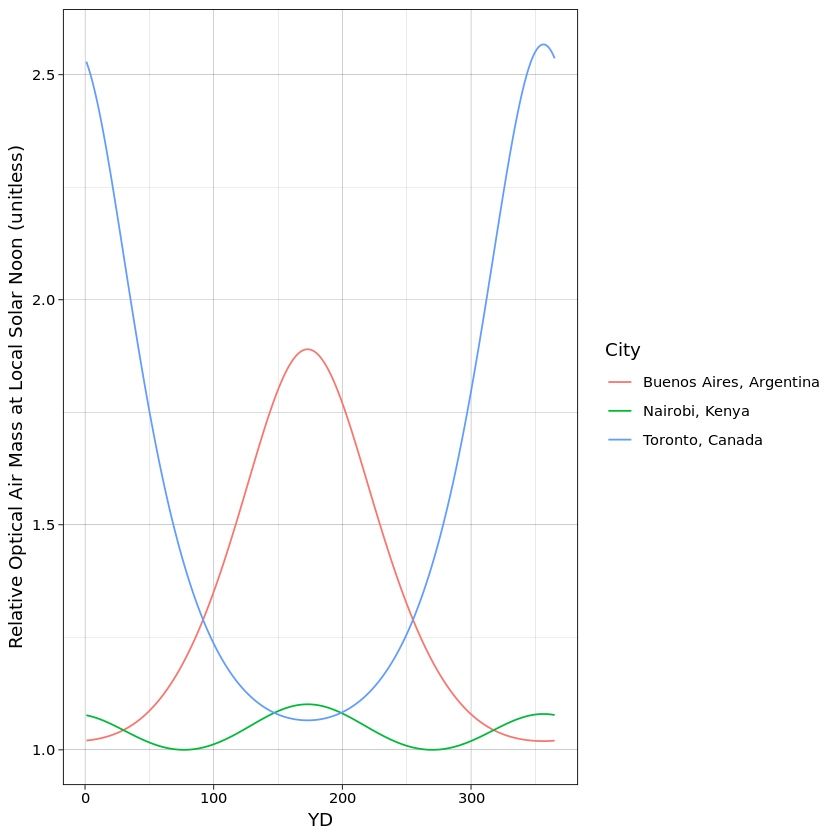

In [7]:
# Let's compare a few different cities:
latitude1 <- 43.65
name1 <- "Toronto, Canada"
latitude2 <- -34.6
name2 <- "Buenos Aires, Argentina"
latitude3 <- -1.29
name3 <- "Nairobi, Kenya"

# perform the calculations and organise for plotting
days <- seq(1,365,1)
deltas <- getDelta(getGamma(days))
maxZ1 <- getZenithMax(latitude1, deltas); maxZ2 <- getZenithMax(latitude2, deltas); maxZ3 <- getZenithMax(latitude3, deltas)
roam1 <- getRelativeOpticalAirMass(maxZ1); roam2 <- getRelativeOpticalAirMass(maxZ2); roam3 <- getRelativeOpticalAirMass(maxZ3)
roamComp <- as.data.frame(cbind(days, roam1, roam2, roam3))
colnames(roamComp) <- c("Days", name1, name2, name3)
roamComp <- roamComp %>% gather("City","RelOptAirMass", -Days)

# plot
ggplot(roamComp, aes(x=Days, y=RelOptAirMass, col=City)) + geom_line() + theme_linedraw() +
  labs(x="YD", y="Relative Optical Air Mass at Local Solar Noon (unitless)")

#### Q1: Pick three new cities, adjust the above code, and re-plot


#### Q2: The City of Murmansk, Russia, has a latitude of 68.96 degrees and approaches the arctic circle. What happens to our calculation of relative optical air mass at such high latitudes?

#### Q3: What if we modify our simplistic equation for ROAM here to that of Kasten (1966) to include refraction? Use the following function for ROAM instead: